In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as si
import scipy.stats as sts

In [4]:
df = pd.read_csv("titanic_dataset.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.drop("Name",axis=1,inplace=True)

In [10]:
df.drop("Cabin",axis=1,inplace=True)

In [11]:
df.drop("Ticket",axis=1,inplace=True)

In [13]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [14]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [16]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [24]:
from sklearn.preprocessing import OrdinalEncoder
dg = OrdinalEncoder()
df["Embarked"] = dg.fit_transform(df[["Embarked"]])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2.0
1,2,1,1,0,38.0,1,0,71.2833,0.0
2,3,1,3,0,26.0,0,0,7.9250,2.0
3,4,1,1,0,35.0,1,0,53.1000,2.0
4,5,0,3,1,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2.0
887,888,1,1,0,19.0,0,0,30.0000,2.0
888,889,0,3,0,28.0,1,2,23.4500,2.0
889,890,1,1,1,26.0,0,0,30.0000,0.0


In [23]:
from sklearn.preprocessing import LabelEncoder
le  = LabelEncoder()
df["Sex"] = le.fit_transform(df[["Sex"]])
df


C:\Users\PRETHIVEE RAJAN\anaconda32021\envs\webapp\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2.0
1,2,1,1,0,38.0,1,0,71.2833,0.0
2,3,1,3,0,26.0,0,0,7.9250,2.0
3,4,1,1,0,35.0,1,0,53.1000,2.0
4,5,0,3,1,35.0,0,0,8.0500,2.0
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2.0
887,888,1,1,0,19.0,0,0,30.0000,2.0
888,889,0,3,0,28.0,1,2,23.4500,2.0
889,890,1,1,1,26.0,0,0,30.0000,0.0


In [26]:
#functional Transform
np.log(df["Fare"])

C:\Users\PRETHIVEE RAJAN\anaconda32021\envs\webapp\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0      1.981001
1      4.266662
2      2.070022
3      3.972177
4      2.085672
         ...   
886    2.564949
887    3.401197
888    3.154870
889    3.401197
890    2.047693
Name: Fare, Length: 891, dtype: float64

In [28]:
np.reciprocal(df["Age"])

0      0.045455
1      0.026316
2      0.038462
3      0.028571
4      0.028571
         ...   
886    0.037037
887    0.052632
888    0.035714
889    0.038462
890    0.031250
Name: Age, Length: 891, dtype: float64

In [29]:
np.sqrt(df["Embarked"])

0      1.414214
1      0.000000
2      1.414214
3      1.414214
4      1.414214
         ...   
886    1.414214
887    1.414214
888    1.414214
889    0.000000
890    1.000000
Name: Embarked, Length: 891, dtype: float64

In [34]:
##power transformation

##boxcox
df["Age_boxcox"],parameters = sts.boxcox(df["Age"])
df["Pclass_boxcox"],parameters = sts.boxcox(df["Pclass"])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_boxcox,Pclass_boxcox
0,1,0,3,1,22.0,1,0,7.2500,2.0,13.468119,3.376116
1,2,1,1,0,38.0,1,0,71.2833,0.0,21.498728,0.000000
2,3,1,3,0,26.0,0,0,7.9250,2.0,15.563417,3.376116
3,4,1,1,0,35.0,1,0,53.1000,2.0,20.056110,0.000000
4,5,0,3,1,35.0,0,0,8.0500,2.0,20.056110,3.376116
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2.0,16.076643,1.359946
887,888,1,1,0,19.0,0,0,30.0000,2.0,11.845513,0.000000
888,889,0,3,0,28.0,1,2,23.4500,2.0,16.586014,3.376116
889,890,1,1,1,26.0,0,0,30.0000,0.0,15.563417,0.000000


In [43]:
##yeojohnson
df["Survived_yeojohnson"],parameters = sts.yeojohnson(df["Survived"])
df["Sex_yeojohnson"],parameters = sts.yeojohnson(df["Sex"])
df["SibSp_yeojohnson"],parameter = sts.yeojohnson(df["SibSp"])
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_boxcox,Pclass_boxcox,Survived_yeojohnson,Sex_yeojohnson,SibSp_yeojohnson
0,1,0,3,1,22.0,1,0,7.2500,2.0,13.468119,3.376116,-0.000000,2.036954,0.323389
1,2,1,1,0,38.0,1,0,71.2833,0.0,21.498728,0.000000,0.367093,0.000000,0.323389
2,3,1,3,0,26.0,0,0,7.9250,2.0,15.563417,3.376116,0.367093,0.000000,-0.000000
3,4,1,1,0,35.0,1,0,53.1000,2.0,20.056110,0.000000,0.367093,0.000000,0.323389
4,5,0,3,1,35.0,0,0,8.0500,2.0,20.056110,3.376116,-0.000000,2.036954,-0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,2.0,16.076643,1.359946,-0.000000,2.036954,-0.000000
887,888,1,1,0,19.0,0,0,30.0000,2.0,11.845513,0.000000,0.367093,0.000000,-0.000000
888,889,0,3,0,28.0,1,2,23.4500,2.0,16.586014,3.376116,-0.000000,0.000000,0.323389
889,890,1,1,1,26.0,0,0,30.0000,0.0,15.563417,0.000000,0.367093,2.036954,-0.000000


In [45]:
df.skew()

PassengerId            0.000000
Survived               0.478523
Pclass                -0.630548
Sex                   -0.618921
Age                    0.510245
SibSp                  3.695352
Parch                  2.749117
Fare                   4.787317
Embarked              -1.264823
Age_boxcox             0.060508
Pclass_boxcox         -0.481963
Survived_yeojohnson    0.478523
Sex_yeojohnson        -0.618921
SibSp_yeojohnson       0.808608
dtype: float64

In [46]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer()

C:\Users\PRETHIVEE RAJAN\anaconda32021\envs\webapp\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(


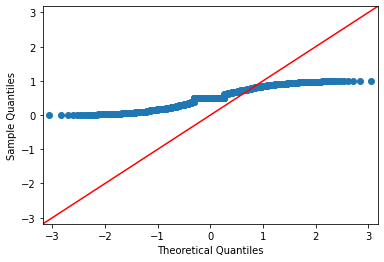

In [61]:
df["Age"] = qt.fit_transform(df[["Age"]])
si.qqplot(df["Age"],line='45')
plt.show()

C:\Users\PRETHIVEE RAJAN\anaconda32021\envs\webapp\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (891). n_quantiles is set to n_samples.
  warnings.warn(


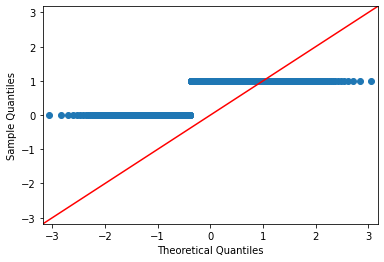

In [60]:
df["Sex"] = qt.fit_transform(df[["Sex"]])
si.qqplot(df["Sex"],line='45')
plt.show()